# When Will You Die In PLAYERUNKNOWN'S BATTLEGROUNDS?

## What is PLAYERUNKNOWN'S BATTLEGROUNDS?

PLAYERUNKNOWN'S BATTLEGROUNDS, aka PUBG, is a Battle Royale online game with an enormous player community. A battle royale game has typically 100 players in an arena with weapons and items scattered throughout the arena, where players drop into the map and try to gether loot in order to outlive everybody else.

##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
d = pd.read_csv('data/agg_match_stats_1k.csv')
e = pd.read_csv('data/agg_match_stats_2k.csv')
a = pd.read_csv('data/agg_match_stats_3k.csv')
t = pd.read_csv('data/agg_match_stats_4k.csv')
h = pd.read_csv('data/agg_match_stats_5k.csv')
x = pd.concat([d,e,a,t,h])
#d=d[d.party_size==1]
f = x[['game_size','match_mode','party_size','player_name','player_survive_time','team_placement','match_id']]
f['match_id'].astype(str)
f = f[f.party_size == 1]
f = f[f.player_survive_time <= 2000]
y = f[f.team_placement >= 75]
print(x.info())
print(f)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99995 entries, 0 to 19998
Data columns (total 15 columns):
date                   99995 non-null object
game_size              99995 non-null int64
match_id               99995 non-null object
match_mode             99995 non-null object
party_size             99995 non-null int64
player_assists         99995 non-null int64
player_dbno            99995 non-null int64
player_dist_ride       99995 non-null float64
player_dist_walk       99995 non-null float64
player_dmg             99995 non-null int64
player_kills           99995 non-null int64
player_name            99841 non-null object
player_survive_time    99995 non-null float64
team_id                99995 non-null int64
team_placement         99995 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 12.2+ MB
None
       game_size match_mode  party_size       player_name  \
494           91        tpp           1             Satch   
495           91        tpp    

In [36]:
t = f.match_id
len(t.unique())


224

## Trends in the sample

In [3]:
g = f.groupby('team_placement').player_survive_time.mean()
print(g)
i = f.groupby('match_id').player_survive_time.mean()
i = i[i <= 950]
print(i.head())
j = y.groupby('match_id').player_survive_time.mean()
#print(j.head())
k = f.groupby('team_placement').count()

team_placement
1     1875.167810
2     1876.691854
3     1824.539949
4     1766.245115
5     1729.136050
6     1681.644735
7     1647.661454
8     1614.920253
9     1584.503170
10    1552.207138
11    1524.516837
12    1494.531694
13    1468.598203
14    1446.108305
15    1415.670177
16    1389.271452
17    1367.995194
18    1331.880315
19    1298.605152
20    1267.635316
21    1242.297832
22    1208.943169
23    1182.368663
24    1148.920024
25    1120.581816
26    1097.680322
27    1067.097827
28    1029.518365
29    1018.568602
30     990.544315
         ...     
70     230.277366
71     217.353010
72     219.577121
73     213.843685
74     195.350098
75     196.412884
76     200.631826
77     184.706525
78     180.454152
79     178.203135
80     165.376043
81     178.114837
82     167.785897
83     157.130969
84     162.735794
85     150.426516
86     151.373033
87     132.247475
88     137.792358
89     167.831301
90     156.633818
91     134.168974
92     164.374988
93     137.13

### Number of teams in the dataset in each team placement

In [39]:
print(f.groupby('team_placement').player_name.count())

team_placement
1     205
2     205
3     216
4     217
5     221
6     223
7     218
8     221
9     217
10    218
11    215
12    218
13    216
14    213
15    214
16    210
17    210
18    213
19    204
20    211
21    213
22    213
23    208
24    206
25    205
26    214
27    207
28    203
29    206
30    199
     ... 
70    213
71    207
72    214
73    216
74    214
75    215
76    213
77    223
78    216
79    207
80    207
81    215
82    201
83    193
84    204
85    182
86    179
87    181
88    179
89    195
90    192
91    151
92    168
93    141
94    144
95    150
96     95
97     68
98     60
99     23
Name: player_name, Length: 99, dtype: int64


Histogram shows the probability of survival time in a game

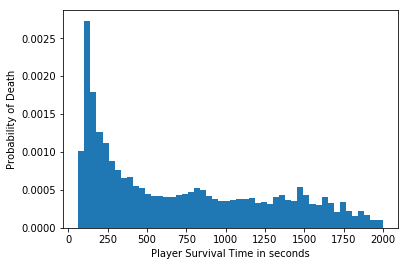

In [20]:
plt.hist(f.player_survive_time,bins=50,normed=True)
plt.xlabel('Player Survival Time in seconds')
plt.ylabel("Probability of Death")
plt.show()

The histogram shows that there is a spike in probability of player deaths very early and then a sharp decay. It levels off at around 500 after which there is a slow decay until the end.

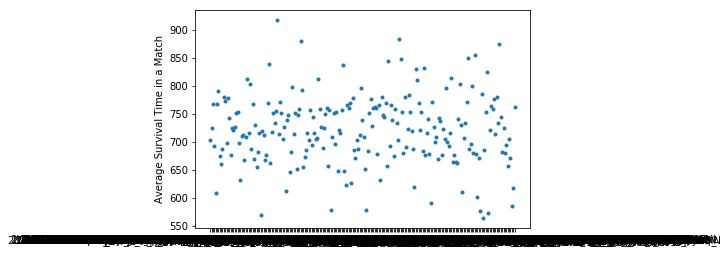

In [22]:
plt.plot(i,marker='.',linestyle='None')
plt.ylabel("Average Survival Time in a Match")
plt.show()

The scatterplot of average player survive times in each match gives no useful information since there is no noticeable trend. If a linear regression line is made there would be too many outliers, making it useless.

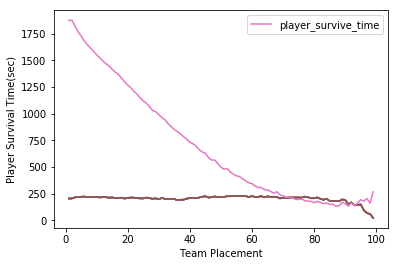

In [38]:
_=plt.plot(k)
_=plt.plot(g)
plt.ylabel("Player Survival Time(sec)")
plt.xlabel("Team Placement")
plt.legend()
plt.show()

The average time a player is alive is higher as his team placement gets closer to one, which makes sense considering that whoever wins has outlived all other players in their match which gives him team placement of one. However, looking at the count and mean graph shows some irregularity towards the right hand side of the graph. The number of teams that place close to 100 are significantly less than teams that place higher. And also the average survival time of teams close to 100 are higher than what would be expected considering the trend of the rest of the means. This irregularity in the count can be understood if party size column is observed. Since we are looking at games that are not exclusively solo players, party size equal to one, this means that the number of teams in a match can be much less than 100 since only 100 players can be in any given match and party size in a match can differ.

In [8]:
mu = np.mean(i)
sigma = np.std(i)
fit = norm.pdf(i,np.mean(i),np.std(i))

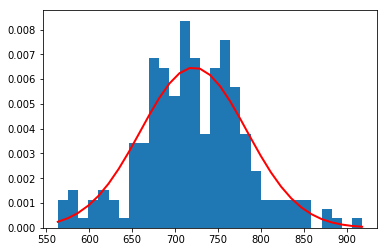

In [9]:
count, bins, ignored = plt.hist(i,bins=30,normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

The normal curve doesn't fit too well with the histogram of the mean survival time of each match but does that mean the normal distribution isn't useful for this dataset?

In [10]:
def ecdf(data):
    n = len(data)
    x= np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

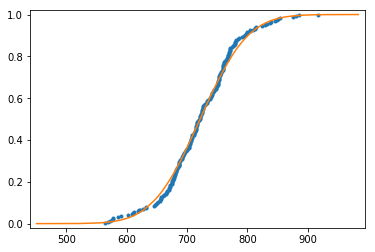

In [11]:
x,y = ecdf(i)
plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)
samples = np.random.normal(mu,sigma,100000)
x_s,y_s = ecdf(samples)
plt.plot(x_s,y_s)
plt.show()

The cumulative density function of the sample versus the normal cdf given the sample's mean and standard deviation lie very close to one another. This indicates that the Central Limit Theorem is most likely applicable for the sample.